In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import random as ran

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Define a stock list
stocks_list = ['AAPL', 'FB', 'NFLX', 'GOOG']

stocks_data = yf.download(stocks_list, start='2015-01-01', end='2020-08-30')['Adj Close']

stocks_data.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,FB,GOOG,NFLX
Date,,,,
2014-12-31,25.057606,78.019997,524.958740,48.801430
2015-01-02,24.819241,78.449997,523.373108,49.848572
2015-01-05,24.120045,77.190002,512.463013,47.311428
2015-01-06,24.122320,76.150002,500.585632,46.501431
2015-01-07,24.460564,76.150002,499.727997,46.742859


In [3]:
daily_returns = stocks_data.pct_change().dropna()

In [4]:
mean_returns = daily_returns.mean()

In [5]:
mean_returns

AAPL    0.001289
FB      0.001129
GOOG    0.000942
NFLX    0.002022
dtype: float64

In [6]:
demean_returns = stocks_data.pct_change().dropna().copy()

for stock in stocks_list:
    demean_returns[stock] = demean_returns[stock] - mean_returns[stock]
else:
    print('Commputations completed!')

demean_returns.head()

Commputations completed!


,AAPL,FB,GOOG,NFLX
Date,,,,
2015-01-02,-0.010802,0.004383,-0.003963,0.019435
2015-01-05,-0.029461,-0.017190,-0.021788,-0.052919
2015-01-06,-0.001195,-0.014602,-0.024119,-0.019142
2015-01-07,0.012733,-0.001129,-0.002656,0.003170
2015-01-08,0.037133,0.025529,0.002211,0.020166


In [7]:
cov_matrix = demean_returns.T.dot(demean_returns) / len(stocks_data)

cov_matrix

,AAPL,FB,GOOG,NFLX
AAPL,0.000330,0.000205,0.000187,0.000196
FB,0.000205,0.000393,0.000221,0.000235
GOOG,0.000187,0.000221,0.000283,0.000221
NFLX,0.000196,0.000235,0.000221,0.000718


In [8]:
# Define equal allocations weights
w = 1 / len(stocks_list)
weights = np.full(len(stocks_list), w)

weights

array([0.25, 0.25, 0.25, 0.25])

In [9]:
# Calculate portfolio variance
portfolio_variance = (weights.T.dot(cov_matrix.values)).dot(weights)

portfolio_variance

0.00026586183950853717

In [18]:
np.random.dirichlet(np.ones(8), size=1)

array([[0.07579385, 0.15181176, 0.06346134, 0.17902142, 0.27340894,
        0.03052375, 0.16005163, 0.06592732]])

In [11]:
# Optimizing weights
portfolios = pd.DataFrame(columns=['AAPL', 'FB', 'GOOG', 'NFLX', 'Ann_Returns', 'Ann_Variance'])

# Define number of stocks
no_of_stocks = 4

# Define temporary dictionary to hold data within a for loop
new_data = {}

# Generate 1000 portfolios
for i in range(0, 10000):
    
    # Generate random weights which equals to 1
    weights = np.reshape(np.random.dirichlet(np.ones(no_of_stocks), size=1), newshape=(no_of_stocks,))
    
    # Calculate daily returns of each portfolio
    daily_port_returns = (weights[0] * daily_returns[stocks_list[0]]) + \
                    (weights[1] * daily_returns[stocks_list[1]]) + \
                    (weights[2] * daily_returns[stocks_list[2]]) + \
                    (weights[3] * daily_returns[stocks_list[3]])
                
    # Calculate cumulative returns of each portfolio
    cum_returns = (1 + daily_port_returns).cumprod() - 1
    
    # Calculate annualized returns of each portfolio
    trading_days = 252
    n = len(daily_port_returns)
    ann_returns = ((1 + cum_returns[-1]) ** (trading_days/n)) - 1
    
    # Calculate daily returns of each portfolio
    daily_variance = (weights.T.dot(cov_matrix.values)).dot(weights)
    
    # Calculate annualized variance of each portfolio
    ann_variance = daily_variance * np.sqrt(252)
    
    # Print weights for each portfolio along with its annualized variance
    print(np.round(weights, 3), round(ann_variance, 6))
    
    # Append data to the dataframe
    new_data['AAPL'] = np.round(weights[0], 3)
    new_data['FB'] = np.round(weights[1], 3)
    new_data['GOOG'] = np.round(weights[2], 3)
    new_data['NFLX'] = np.round(weights[3], 3)
    new_data['Ann_Returns'] = round(ann_returns, 3)
    new_data['Ann_Variance'] = round(ann_variance, 6)
    
    portfolios = portfolios.append(new_data, ignore_index=True)

[0.46  0.08  0.441 0.02 ] 0.00384
[0.123 0.062 0.735 0.081] 0.00402
[0.333 0.085 0.164 0.418] 0.004958
[0.312 0.501 0.038 0.149] 0.004443
[0.631 0.088 0.111 0.17 ] 0.004277
[0.341 0.208 0.127 0.324] 0.00453
[0.563 0.05  0.049 0.338] 0.00478
[0.319 0.135 0.312 0.234] 0.004088
[0.02  0.488 0.05  0.442] 0.00578
[0.705 0.118 0.012 0.165] 0.004486
[0.242 0.419 0.248 0.09 ] 0.004097
[0.266 0.192 0.253 0.289] 0.004317
[0.226 0.017 0.145 0.612] 0.00643
[0.422 0.094 0.226 0.258] 0.004219
[0.196 0.088 0.242 0.474] 0.005307
[0.252 0.293 0.177 0.278] 0.004388
[0.164 0.005 0.715 0.116] 0.004021
[0.049 0.098 0.8   0.053] 0.004145
[0.164 0.434 0.136 0.266] 0.004601
[0.291 0.162 0.146 0.401] 0.004883
[0.219 0.043 0.359 0.38 ] 0.004712
[0.244 0.221 0.048 0.487] 0.005531
[0.338 0.331 0.006 0.325] 0.004739
[0.543 0.096 0.198 0.164] 0.004088
[0.155 0.513 0.118 0.214] 0.004606
[0.462 0.095 0.415 0.028] 0.003839
[0.724 0.095 0.053 0.127] 0.004428
[0.024 0.293 0.431 0.251] 0.004438
[0.126 0.034 0.035 0.804] 

[0.037 0.691 0.131 0.141] 0.00501
[0.091 0.11  0.471 0.329] 0.004566
[0.043 0.654 0.018 0.286] 0.005379
[0.248 0.253 0.129 0.37 ] 0.004789
[0.092 0.13  0.646 0.132] 0.004045
[0.324 0.228 0.397 0.052] 0.003823
[0.248 0.057 0.218 0.477] 0.005321
[0.248 0.412 0.218 0.121] 0.00413
[0.011 0.437 0.309 0.243] 0.004629
[0.106 0.412 0.473 0.008] 0.004138
[0.473 0.031 0.234 0.263] 0.004274
[0.819 0.027 0.101 0.053] 0.004569
[0.028 0.24  0.325 0.407] 0.005095
[0.61  0.042 0.317 0.032] 0.004027
[0.192 0.047 0.467 0.294] 0.004334
[0.268 0.466 0.038 0.229] 0.004563
[0.663 0.119 0.021 0.197] 0.004465
[0.078 0.448 0.233 0.241] 0.004573
[0.484 0.057 0.21  0.249] 0.004242
[0.349 0.372 0.038 0.241] 0.004449
[0.009 0.644 0.293 0.054] 0.004759
[0.201 0.456 0.118 0.224] 0.004495
[0.652 0.265 0.056 0.028] 0.004306
[0.15  0.481 0.29  0.08 ] 0.004237
[0.375 0.399 0.109 0.117] 0.004172
[0.366 0.208 0.042 0.384] 0.004894
[0.743 0.014 0.005 0.238] 0.004766
[0.114 0.533 0.13  0.223] 0.004702
[0.132 0.105 0.696 0.0

[0.391 0.356 0.251 0.002] 0.004004
[0.06  0.644 0.222 0.073] 0.004723
[0.358 0.21  0.424 0.007] 0.003824
[0.371 0.063 0.029 0.537] 0.005866
[0.107 0.411 0.128 0.353] 0.004985
[0.689 0.09  0.079 0.142] 0.004356
[0.072 0.019 0.521 0.389] 0.004918
[0.298 0.065 0.61  0.027] 0.003832
[0.249 0.464 0.159 0.128] 0.004257
[0.234 0.099 0.    0.667] 0.00703
[0.154 0.062 0.106 0.677] 0.0071
[0.246 0.555 0.06  0.139] 0.004531
[0.26  0.362 0.348 0.029] 0.003963
[0.373 0.342 0.155 0.13 ] 0.004079
[0.767 0.013 0.193 0.026] 0.004388
[0.174 0.431 0.257 0.138] 0.004204
[0.077 0.13  0.094 0.7  ] 0.00742
[0.073 0.709 0.069 0.15 ] 0.005077
[0.113 0.345 0.295 0.247] 0.004383
[0.518 0.077 0.333 0.072] 0.003904
[0.442 0.03  0.169 0.359] 0.004684
[0.046 0.308 0.226 0.421] 0.005239
[0.707 0.117 0.043 0.134] 0.004411
[0.338 0.075 0.219 0.368] 0.00466
[0.008 0.287 0.364 0.34 ] 0.004814
[0.261 0.1   0.486 0.153] 0.003895
[0.163 0.146 0.227 0.464] 0.005277
[0.377 0.23  0.131 0.262] 0.004308
[0.095 0.422 0.332 0.151]

[0.255 0.373 0.267 0.106] 0.004033
[0.21  0.181 0.139 0.47 ] 0.005342
[0.461 0.029 0.456 0.053] 0.003852
[0.018 0.141 0.129 0.713] 0.007614
[0.51  0.134 0.342 0.015] 0.003895
[0.212 0.013 0.138 0.637] 0.006666
[0.145 0.55  0.152 0.153] 0.004535
[0.181 0.272 0.13  0.417] 0.005094
[0.319 0.185 0.347 0.149] 0.003897
[0.283 0.218 0.292 0.206] 0.004048
[0.241 0.126 0.594 0.039] 0.003835
[0.443 0.016 0.114 0.427] 0.005097
[0.16  0.251 0.102 0.487] 0.005559
[0.023 0.09  0.338 0.549] 0.006026
[0.1   0.615 0.005 0.28 ] 0.005199
[0.492 0.033 0.392 0.083] 0.003887
[0.602 0.237 0.107 0.054] 0.004161
[0.165 0.209 0.249 0.377] 0.00478
[0.151 0.201 0.355 0.293] 0.004375
[0.04  0.387 0.303 0.269] 0.004599
[0.432 0.419 0.015 0.134] 0.004332
[0.398 0.379 0.018 0.205] 0.004393
[0.07  0.027 0.766 0.137] 0.004177
[0.16  0.212 0.473 0.156] 0.003982
[0.03  0.444 0.014 0.512] 0.006197
[0.431 0.013 0.545 0.011] 0.003861
[0.062 0.202 0.104 0.632] 0.006801
[0.491 0.08  0.088 0.341] 0.004681
[0.497 0.03  0.309 0.

[0.101 0.35  0.018 0.531] 0.006104
[0.2   0.073 0.123 0.604] 0.006369
[0.08  0.036 0.175 0.709] 0.007469
[0.386 0.034 0.085 0.496] 0.005527
[0.558 0.009 0.028 0.404] 0.00514
[0.011 0.629 0.352 0.008] 0.004707
[0.042 0.067 0.164 0.727] 0.00771
[0.19  0.232 0.438 0.141] 0.003943
[0.212 0.001 0.148 0.639] 0.006691
[0.118 0.412 0.268 0.201] 0.004346
[0.304 0.004 0.229 0.463] 0.005222
[0.313 0.428 0.197 0.061] 0.004108
[0.05  0.581 0.331 0.038] 0.004533
[0.102 0.288 0.111 0.499] 0.005722
[0.02  0.291 0.412 0.277] 0.004533
[0.064 0.086 0.828 0.022] 0.004152
[0.162 0.526 0.263 0.049] 0.004313
[0.045 0.3   0.101 0.555] 0.006233
[0.066 0.212 0.468 0.254] 0.004334
[0.132 0.09  0.339 0.438] 0.005105
[0.094 0.125 0.469 0.312] 0.00449
[0.215 0.057 0.09  0.638] 0.006696
[0.04  0.815 0.101 0.045] 0.005345
[0.611 0.207 0.161 0.022] 0.00412
[0.218 0.266 0.203 0.313] 0.004504
[0.4   0.502 0.003 0.096] 0.004431
[0.329 0.032 0.396 0.243] 0.004113
[0.235 0.274 0.343 0.147] 0.003967
[0.087 0.772 0.105 0.036

[0.349 0.089 0.247 0.315] 0.004398
[0.068 0.228 0.33  0.374] 0.004857
[0.678 0.115 0.122 0.084] 0.004241
[0.29  0.204 0.003 0.503] 0.005659
[0.234 0.151 0.109 0.505] 0.005585
[0.108 0.565 0.217 0.111] 0.004505
[0.806 0.073 0.014 0.107] 0.00463
[0.031 0.773 0.124 0.072] 0.005208
[0.011 0.814 0.1   0.075] 0.005394
[0.004 0.15  0.065 0.78 ] 0.00842
[0.131 0.137 0.461 0.271] 0.004291
[0.396 0.026 0.18  0.398] 0.004861
[0.539 0.006 0.048 0.407] 0.005119
[0.343 0.115 0.008 0.535] 0.005864
[0.205 0.611 0.066 0.118] 0.004649
[0.079 0.765 0.154 0.002] 0.0051
[0.01  0.222 0.356 0.412] 0.005141
[0.236 0.108 0.344 0.312] 0.004376
[0.188 0.294 0.388 0.129] 0.003977
[0.508 0.062 0.204 0.225] 0.004194
[0.35  0.21  0.226 0.214] 0.004091
[0.388 0.53  0.036 0.046] 0.004431
[0.129 0.492 0.368 0.012] 0.00425
[0.41  0.001 0.03  0.559] 0.006066
[0.248 0.287 0.336 0.128] 0.003946
[0.102 0.617 0.167 0.114] 0.004669
[0.037 0.601 0.316 0.045] 0.004601
[0.248 0.572 0.157 0.022] 0.004425
[0.433 0.306 0.218 0.043]

[0.067 0.13  0.578 0.225] 0.004246
[0.072 0.534 0.331 0.063] 0.004402
[0.035 0.054 0.596 0.316] 0.00463
[0.676 0.169 0.035 0.12 ] 0.004354
[0.19  0.261 0.544 0.005] 0.003911
[0.013 0.345 0.236 0.406] 0.005238
[0.032 0.783 0.048 0.137] 0.005365
[0.006 0.187 0.036 0.771] 0.008352
[0.139 0.034 0.061 0.766] 0.008091
[0.157 0.284 0.038 0.521] 0.005883
[0.228 0.348 0.411 0.012] 0.003955
[0.004 0.127 0.664 0.206] 0.004328
[0.014 0.023 0.043 0.92 ] 0.010178
[0.527 0.104 0.176 0.194] 0.004144
[0.105 0.518 0.355 0.021] 0.004325
[0.299 0.007 0.033 0.662] 0.006954
[0.402 0.051 0.505 0.043] 0.003816
[0.08  0.127 0.008 0.785] 0.00841
[0.26  0.108 0.452 0.179] 0.003943
[0.036 0.269 0.467 0.228] 0.004332
[0.433 0.143 0.176 0.248] 0.00422
[0.165 0.765 0.02  0.049] 0.005116
[0.003 0.024 0.969 0.005] 0.004428
[0.22  0.201 0.488 0.091] 0.003856
[0.535 0.195 0.018 0.253] 0.004461
[0.059 0.264 0.062 0.614] 0.006715
[0.67  0.134 0.017 0.179] 0.004445
[0.052 0.145 0.564 0.239] 0.004305
[0.003 0.072 0.311 0.61

[0.217 0.45  0.252 0.081] 0.004151
[0.303 0.155 0.347 0.195] 0.003981
[0.161 0.041 0.237 0.561] 0.005991
[0.024 0.421 0.307 0.248] 0.004602
[0.203 0.668 0.102 0.026] 0.004728
[0.424 0.321 0.145 0.11 ] 0.004059
[0.425 0.189 0.329 0.058] 0.003844
[0.377 0.155 0.092 0.376] 0.004789
[0.009 0.68  0.102 0.21 ] 0.005186
[0.111 0.288 0.601 0.001] 0.004023
[0.126 0.207 0.179 0.488] 0.005521
[0.    0.037 0.586 0.377] 0.004978
[0.048 0.077 0.155 0.719] 0.007619
[0.43  0.212 0.219 0.139] 0.003968
[0.201 0.142 0.019 0.638] 0.006761
[0.361 0.004 0.164 0.47 ] 0.005305
[0.201 0.049 0.496 0.253] 0.004186
[0.004 0.043 0.953 0.001] 0.004401
[0.113 0.018 0.249 0.62 ] 0.00654
[0.077 0.113 0.206 0.604] 0.006447
[0.115 0.516 0.32  0.048] 0.004316
[0.237 0.109 0.388 0.266] 0.004194
[0.137 0.2   0.529 0.134] 0.003972
[0.091 0.158 0.41  0.341] 0.004624
[0.581 0.066 0.307 0.045] 0.003981
[0.009 0.228 0.226 0.537] 0.006019
[0.077 0.394 0.145 0.385] 0.005146
[0.407 0.155 0.376 0.063] 0.003816
[0.102 0.447 0.046 0.

[0.033 0.432 0.478 0.057] 0.004258
[0.376 0.171 0.187 0.266] 0.004258
[0.034 0.391 0.053 0.521] 0.00614
[0.512 0.031 0.439 0.018] 0.003897
[0.381 0.349 0.24  0.029] 0.003985
[0.077 0.785 0.01  0.129] 0.005339
[0.271 0.401 0.177 0.151] 0.004171
[0.001 0.063 0.232 0.704] 0.007501
[0.112 0.504 0.313 0.071] 0.004303
[0.309 0.484 0.057 0.15 ] 0.004393
[0.297 0.133 0.415 0.155] 0.003887
[0.131 0.048 0.392 0.429] 0.005053
[0.147 0.465 0.279 0.109] 0.004239
[0.199 0.063 0.004 0.734] 0.007733
[0.144 0.094 0.676 0.086] 0.003957
[0.189 0.189 0.252 0.371] 0.00472
[0.28  0.226 0.321 0.173] 0.00397
[0.126 0.45  0.089 0.335] 0.004974
[0.009 0.103 0.47  0.418] 0.005145
[0.554 0.067 0.155 0.223] 0.004267
[0.034 0.025 0.036 0.905] 0.009953
[0.037 0.141 0.419 0.403] 0.005012
[0.052 0.169 0.759 0.02 ] 0.004114
[0.02  0.192 0.373 0.414] 0.005119
[0.01  0.327 0.408 0.255] 0.004505
[0.2   0.446 0.236 0.118] 0.004194
[0.137 0.167 0.135 0.56 ] 0.00606
[0.121 0.367 0.421 0.092] 0.004071
[0.341 0.167 0.129 0.363

[0.642 0.059 0.084 0.216] 0.004424
[0.47  0.3   0.174 0.056] 0.004018
[0.047 0.125 0.317 0.512] 0.005709
[0.131 0.009 0.255 0.605] 0.006388
[0.131 0.147 0.07  0.652] 0.006905
[0.107 0.154 0.352 0.388] 0.004845
[0.545 0.095 0.107 0.252] 0.004373
[0.251 0.05  0.111 0.588] 0.006221
[0.134 0.048 0.176 0.641] 0.006737
[0.307 0.514 0.163 0.015] 0.004288
[0.38  0.067 0.427 0.126] 0.003852
[0.765 0.01  0.133 0.092] 0.004438
[0.321 0.572 0.037 0.071] 0.004514
[0.02  0.177 0.073 0.73 ] 0.007844
[0.272 0.219 0.18  0.329] 0.004531
[0.679 0.207 0.071 0.043] 0.004301
[0.514 0.187 0.109 0.189] 0.004185
[0.448 0.07  0.288 0.195] 0.004031
[0.329 0.039 0.013 0.619] 0.006556
[0.348 0.514 0.124 0.014] 0.004319
[0.036 0.018 0.915 0.031] 0.004305
[0.294 0.274 0.271 0.16 ] 0.003994
[0.455 0.474 0.052 0.019] 0.004347
[0.138 0.528 0.159 0.175] 0.004532
[0.038 0.089 0.555 0.317] 0.004608
[0.014 0.234 0.143 0.61 ] 0.006664
[0.065 0.123 0.172 0.64 ] 0.006802
[0.342 0.049 0.521 0.089] 0.003822
[0.546 0.114 0.012 0

[0.236 0.379 0.278 0.107] 0.004046
[0.06  0.006 0.425 0.509] 0.005686
[0.474 0.44  0.08  0.006] 0.004284
[0.136 0.507 0.354 0.003] 0.00428
[0.306 0.23  0.03  0.433] 0.005189
[0.3   0.026 0.672 0.002] 0.003886
[0.544 0.157 0.061 0.237] 0.004371
[0.705 0.067 0.043 0.186] 0.004501
[0.602 0.249 0.041 0.108] 0.004256
[0.693 0.017 0.232 0.058] 0.004208
[0.454 0.043 0.125 0.378] 0.004813
[0.239 0.092 0.654 0.015] 0.003869
[0.241 0.185 0.208 0.366] 0.004685
[0.073 0.221 0.533 0.172] 0.004121
[0.312 0.292 0.213 0.183] 0.00408
[0.128 0.593 0.036 0.244] 0.00496
[0.319 0.547 0.091 0.043] 0.004404
[0.345 0.04  0.065 0.55 ] 0.00594
[0.169 0.527 0.281 0.023] 0.004304
[0.18  0.268 0.194 0.359] 0.004742
[0.31  0.027 0.335 0.328] 0.004442
[0.075 0.455 0.079 0.391] 0.005327
[0.139 0.093 0.038 0.729] 0.007696
[0.269 0.092 0.367 0.272] 0.004208
[0.246 0.138 0.1   0.516] 0.005663
[0.126 0.338 0.321 0.215] 0.00426
[0.395 0.252 0.048 0.305] 0.004555
[0.197 0.556 0.233 0.013] 0.004373
[0.229 0.212 0.518 0.041]

[0.263 0.053 0.514 0.17 ] 0.003939
[0.035 0.052 0.231 0.681] 0.007216
[0.143 0.223 0.188 0.446] 0.00523
[0.318 0.029 0.434 0.219] 0.004042
[0.194 0.331 0.417 0.058] 0.00395
[0.247 0.18  0.289 0.285] 0.004293
[0.169 0.273 0.399 0.159] 0.004019
[0.115 0.355 0.088 0.442] 0.005419
[0.549 0.053 0.235 0.163] 0.00408
[0.245 0.031 0.392 0.332] 0.00447
[0.472 0.328 0.046 0.154] 0.00424
[0.23  0.269 0.447 0.054] 0.003871
[0.937 0.019 0.009 0.034] 0.004997
[0.274 0.099 0.021 0.607] 0.006442
[0.004 0.471 0.144 0.381] 0.005356
[0.122 0.503 0.144 0.231] 0.004647
[0.06  0.318 0.517 0.105] 0.004107
[0.417 0.08  0.147 0.356] 0.004661
[0.095 0.1   0.469 0.335] 0.004592
[0.207 0.569 0.132 0.092] 0.004469
[0.396 0.126 0.347 0.131] 0.003869
[0.219 0.612 0.094 0.075] 0.004585
[0.136 0.498 0.111 0.255] 0.004721
[0.071 0.323 0.309 0.296] 0.004579
[0.05  0.207 0.559 0.185] 0.00418
[0.015 0.264 0.699 0.022] 0.004173
[0.034 0.395 0.405 0.165] 0.004318
[0.293 0.015 0.108 0.584] 0.006188
[0.128 0.466 0.082 0.324] 

[0.178 0.024 0.222 0.575] 0.006105
[0.174 0.154 0.21  0.463] 0.005271
[0.05  0.096 0.636 0.217] 0.004272
[0.064 0.231 0.661 0.043] 0.004055
[0.309 0.01  0.279 0.403] 0.004841
[0.016 0.37  0.36  0.254] 0.004548
[0.037 0.859 0.084 0.02 ] 0.005527
[0.766 0.039 0.17  0.025] 0.004389
[0.668 0.056 0.156 0.119] 0.004234
[0.097 0.121 0.171 0.611] 0.0065
[0.135 0.037 0.296 0.532] 0.00577
[0.095 0.7   0.019 0.186] 0.005143
[0.092 0.408 0.216 0.284] 0.004648
[0.06  0.132 0.735 0.072] 0.004084
[0.284 0.005 0.311 0.4  ] 0.004819
[0.429 0.088 0.464 0.018] 0.003822
[0.271 0.221 0.26  0.248] 0.004183
[0.194 0.064 0.206 0.536] 0.005772
[0.639 0.06  0.195 0.106] 0.004146
[0.218 0.316 0.114 0.353] 0.004784
[0.632 0.024 0.103 0.241] 0.004474
[0.112 0.036 0.246 0.606] 0.006409
[0.027 0.043 0.894 0.037] 0.004283
[0.198 0.216 0.56  0.027] 0.003874
[0.109 0.005 0.068 0.818] 0.008737
[0.163 0.243 0.443 0.151] 0.003987
[0.134 0.577 0.251 0.038] 0.004454
[0.486 0.08  0.405 0.029] 0.003859
[0.718 0.035 0.019 0.22

[0.372 0.092 0.431 0.105] 0.003823
[0.459 0.113 0.428 0.   ] 0.003848
[0.274 0.375 0.126 0.225] 0.004334
[0.317 0.172 0.11  0.401] 0.004904
[0.103 0.318 0.313 0.266] 0.004422
[0.121 0.163 0.145 0.571] 0.006158
[0.508 0.254 0.144 0.094] 0.004049
[0.53  0.077 0.072 0.321] 0.004642
[0.615 0.017 0.2   0.169] 0.004208
[0.267 0.495 0.074 0.164] 0.004431
[0.039 0.09  0.087 0.784] 0.008386
[0.152 0.084 0.003 0.761] 0.008063
[0.452 0.004 0.489 0.054] 0.00386
[0.046 0.177 0.284 0.492] 0.005587
[0.254 0.189 0.344 0.213] 0.004047
[0.142 0.564 0.172 0.123] 0.004509
[0.552 0.404 0.009 0.035] 0.004363
[0.093 0.17  0.116 0.621] 0.006632
[0.143 0.151 0.235 0.471] 0.005343
[0.449 0.06  0.112 0.379] 0.004818
[0.145 0.014 0.159 0.682] 0.00714
[0.047 0.198 0.522 0.232] 0.004294
[0.027 0.582 0.25  0.141] 0.004673
[0.052 0.453 0.175 0.319] 0.004936
[0.105 0.009 0.301 0.585] 0.006232
[0.157 0.595 0.145 0.103] 0.004565
[0.28  0.474 0.102 0.144] 0.004331
[0.047 0.032 0.262 0.659] 0.006981
[0.513 0.223 0.23  0.0

[0.037 0.262 0.576 0.126] 0.004132
[0.168 0.683 0.068 0.081] 0.00483
[0.046 0.647 0.047 0.26 ] 0.005237
[0.124 0.111 0.608 0.156] 0.004029
[0.368 0.099 0.129 0.404] 0.004901
[0.085 0.348 0.213 0.354] 0.004879
[0.388 0.035 0.545 0.033] 0.003826
[0.419 0.189 0.292 0.1  ] 0.003875
[0.482 0.064 0.277 0.176] 0.00402
[0.242 0.067 0.101 0.591] 0.006251
[0.735 0.163 0.029 0.074] 0.004438
[0.231 0.091 0.023 0.655] 0.006894
[0.136 0.624 0.136 0.104] 0.004663
[0.482 0.001 0.213 0.304] 0.004457
[0.117 0.312 0.448 0.122] 0.004044
[0.105 0.222 0.478 0.196] 0.004126
[0.354 0.244 0.061 0.341] 0.004683
[0.085 0.313 0.032 0.57 ] 0.006371
[0.27  0.134 0.584 0.013] 0.003828
[0.65  0.204 0.106 0.041] 0.004219
[0.014 0.52  0.048 0.418] 0.005715
[0.433 0.343 0.015 0.21 ] 0.004378
[0.086 0.418 0.478 0.017] 0.004166
[0.494 0.256 0.152 0.098] 0.004035
[0.175 0.356 0.311 0.158] 0.004112
[0.371 0.164 0.011 0.455] 0.005314
[0.392 0.023 0.336 0.249] 0.004153
[0.189 0.124 0.373 0.313] 0.004407
[0.81  0.012 0.072 0.1

[0.792 0.011 0.055 0.143] 0.004618
[0.036 0.055 0.833 0.076] 0.004212
[0.471 0.383 0.096 0.05 ] 0.004171
[0.341 0.131 0.032 0.496] 0.005557
[0.46  0.305 0.001 0.234] 0.004436
[0.087 0.339 0.058 0.516] 0.005955
[0.16  0.379 0.159 0.303] 0.004647
[0.058 0.498 0.34  0.104] 0.004374
[0.149 0.668 0.103 0.08 ] 0.004774
[0.275 0.289 0.336 0.1  ] 0.003908
[0.068 0.564 0.323 0.045] 0.00447
[0.004 0.671 0.034 0.29 ] 0.005487
[0.016 0.146 0.143 0.696] 0.007437
[0.11  0.273 0.508 0.109] 0.004008
[0.075 0.203 0.305 0.418] 0.00508
[0.54  0.15  0.137 0.173] 0.004146
[0.473 0.238 0.154 0.135] 0.004045
[0.07  0.564 0.187 0.179] 0.004675
[0.388 0.158 0.348 0.107] 0.003843
[0.171 0.012 0.806 0.011] 0.004046
[0.003 0.032 0.394 0.571] 0.006242
[0.038 0.17  0.189 0.603] 0.006506
[0.142 0.247 0.384 0.227] 0.004184
[0.239 0.252 0.24  0.269] 0.004294
[0.051 0.283 0.015 0.651] 0.007117
[0.441 0.178 0.094 0.287] 0.004426
[0.383 0.026 0.356 0.235] 0.004103
[0.485 0.175 0.019 0.321] 0.00466
[0.199 0.146 0.512 0.14

[0.288 0.405 0.057 0.25 ] 0.004506
[0.249 0.102 0.102 0.547] 0.005886
[0.254 0.024 0.307 0.415] 0.004906
[0.488 0.195 0.207 0.11 ] 0.003971
[0.503 0.116 0.306 0.074] 0.003897
[0.303 0.081 0.238 0.379] 0.004703
[0.317 0.015 0.254 0.414] 0.004911
[0.309 0.054 0.507 0.13 ] 0.00386
[0.255 0.465 0.011 0.269] 0.004718
[0.002 0.457 0.169 0.371] 0.005267
[0.342 0.028 0.253 0.377] 0.004699
[0.084 0.502 0.197 0.217] 0.004612
[0.006 0.629 0.105 0.261] 0.005205
[0.368 0.228 0.099 0.306] 0.004493
[0.06  0.196 0.716 0.028] 0.004078
[0.353 0.04  0.435 0.172] 0.00393
[0.422 0.041 0.483 0.054] 0.003826
[0.039 0.765 0.088 0.108] 0.005224
[0.246 0.265 0.081 0.408] 0.00504
[0.106 0.095 0.28  0.519] 0.005693
[0.256 0.573 0.12  0.05 ] 0.004448
[0.022 0.068 0.619 0.291] 0.004554
[0.345 0.61  0.036 0.009] 0.004613
[0.705 0.009 0.171 0.114] 0.004305
[0.339 0.026 0.188 0.446] 0.005128
[0.263 0.159 0.226 0.352] 0.004588
[0.027 0.031 0.385 0.558] 0.006095
[0.047 0.748 0.153 0.052] 0.005075
[0.488 0.206 0.207 0.1 

[0.122 0.072 0.518 0.288] 0.004377
[0.145 0.491 0.284 0.08 ] 0.004261
[0.089 0.167 0.397 0.347] 0.004657
[0.047 0.733 0.093 0.128] 0.005131
[0.069 0.013 0.245 0.673] 0.007094
[0.663 0.137 0.066 0.134] 0.004311
[0.267 0.314 0.299 0.12 ] 0.003965
[0.188 0.034 0.422 0.357] 0.004615
[0.145 0.775 0.055 0.025] 0.005135
[0.468 0.189 0.271 0.072] 0.003895
[0.323 0.445 0.215 0.017] 0.004129
[0.261 0.127 0.46  0.152] 0.00389
[0.579 0.037 0.314 0.069] 0.003989
[0.781 0.058 0.031 0.13 ] 0.004582
[0.216 0.333 0.186 0.265] 0.004395
[0.069 0.023 0.382 0.527] 0.005798
[0.144 0.26  0.122 0.474] 0.005474
[0.207 0.161 0.242 0.39 ] 0.004806
[0.327 0.048 0.315 0.309] 0.00436
[0.227 0.648 0.102 0.023] 0.004663
[0.666 0.109 0.102 0.123] 0.004269
[0.415 0.078 0.41  0.097] 0.003834
[0.089 0.381 0.057 0.472] 0.005702
[0.126 0.113 0.406 0.356] 0.00465
[0.03  0.493 0.224 0.253] 0.004764
[0.548 0.171 0.082 0.199] 0.004261
[0.232 0.191 0.519 0.058] 0.003834
[0.478 0.301 0.083 0.138] 0.004158
[0.222 0.236 0.087 0.45

[0.437 0.201 0.239 0.123] 0.003936
[0.263 0.403 0.325 0.01 ] 0.004029
[0.204 0.205 0.45  0.141] 0.003921
[0.053 0.32  0.33  0.297] 0.004599
[0.091 0.812 0.082 0.015] 0.005293
[0.047 0.007 0.505 0.442] 0.005261
[0.138 0.505 0.284 0.073] 0.004291
[0.584 0.278 0.082 0.056] 0.004189
[0.865 0.007 0.047 0.082] 0.004758
[0.717 0.105 0.039 0.138] 0.004442
[0.197 0.192 0.111 0.5  ] 0.005582
[0.306 0.14  0.553 0.001] 0.003818
[0.048 0.207 0.307 0.439] 0.005243
[0.212 0.371 0.289 0.129] 0.004068
[0.097 0.182 0.056 0.665] 0.007096
[0.273 0.067 0.495 0.165] 0.003919
[0.257 0.41  0.261 0.071] 0.004062
[0.156 0.012 0.634 0.198] 0.004123
[0.347 0.177 0.393 0.083] 0.003813
[0.208 0.217 0.41  0.165] 0.003965
[0.034 0.291 0.343 0.332] 0.004746
[0.39  0.395 0.02  0.196] 0.004387
[0.136 0.344 0.29  0.231] 0.00431
[0.044 0.276 0.573 0.108] 0.00411
[0.069 0.375 0.413 0.143] 0.004202
[0.923 0.047 0.02  0.01 ] 0.004941
[0.305 0.216 0.326 0.153] 0.003923
[0.163 0.079 0.704 0.055] 0.003945
[0.349 0.313 0.007 0.3

[0.2   0.305 0.483 0.012] 0.003926
[0.556 0.063 0.017 0.364] 0.004919
[0.291 0.104 0.203 0.402] 0.004844
[0.32  0.111 0.368 0.201] 0.003986
[0.268 0.401 0.293 0.038] 0.004026
[0.17  0.389 0.086 0.355] 0.004934
[0.66  0.053 0.17  0.117] 0.004208
[0.183 0.083 0.643 0.09 ] 0.003911
[0.008 0.56  0.269 0.164] 0.004683
[0.047 0.308 0.423 0.222] 0.00433
[0.146 0.199 0.561 0.094] 0.003927
[0.68  0.144 0.078 0.098] 0.004293
[0.376 0.525 0.013 0.086] 0.004453
[0.204 0.313 0.316 0.168] 0.004062
[0.099 0.053 0.123 0.724] 0.007628
[0.264 0.137 0.302 0.296] 0.004313
[0.38  0.009 0.17  0.44 ] 0.005115
[0.255 0.349 0.033 0.363] 0.00492
[0.091 0.642 0.108 0.159] 0.004853
[0.281 0.137 0.296 0.286] 0.004273
[0.162 0.298 0.504 0.035] 0.003944
[0.57  0.022 0.039 0.369] 0.004954
[0.394 0.006 0.138 0.462] 0.005278
[0.192 0.025 0.345 0.437] 0.005065
[0.501 0.027 0.462 0.009] 0.003894
[0.024 0.071 0.494 0.412] 0.005093
[0.193 0.087 0.067 0.654] 0.006869
[0.432 0.049 0.301 0.218] 0.004082
[0.194 0.074 0.272 0.4

[0.146 0.081 0.618 0.155] 0.004012
[0.07  0.722 0.123 0.084] 0.005
[0.061 0.385 0.23  0.324] 0.004813
[0.034 0.525 0.154 0.286] 0.004976
[0.183 0.566 0.095 0.157] 0.004587
[0.072 0.234 0.431 0.264] 0.004368
[0.556 0.023 0.051 0.371] 0.004936
[0.396 0.243 0.01  0.352] 0.00479
[0.106 0.182 0.265 0.446] 0.005217
[0.295 0.084 0.32  0.301] 0.00432
[0.227 0.491 0.151 0.132] 0.004327
[0.358 0.166 0.454 0.021] 0.003801
[0.122 0.275 0.132 0.471] 0.005481
[0.32  0.282 0.047 0.351] 0.00477
[0.164 0.743 0.063 0.03 ] 0.005008
[0.039 0.264 0.413 0.284] 0.004509
[0.076 0.268 0.43  0.226] 0.004267
[0.187 0.155 0.334 0.324] 0.004465
[0.13  0.169 0.231 0.471] 0.005358
[0.551 0.241 0.012 0.196] 0.004356
[0.305 0.103 0.353 0.238] 0.00409
[0.284 0.44  0.206 0.07 ] 0.004129
[0.229 0.001 0.532 0.239] 0.004151
[0.005 0.375 0.144 0.475] 0.00577
[0.075 0.106 0.414 0.405] 0.004971
[0.535 0.086 0.205 0.174] 0.004096
[0.093 0.499 0.406 0.002] 0.004302
[0.1   0.029 0.745 0.126] 0.004108
[0.003 0.426 0.524 0.047] 0.

[0.315 0.399 0.137 0.148] 0.004186
[0.277 0.385 0.18  0.157] 0.004158
[0.121 0.576 0.119 0.183] 0.004697
[0.016 0.348 0.387 0.249] 0.004501
[0.416 0.255 0.084 0.246] 0.004323
[0.09  0.594 0.289 0.028] 0.004526
[0.076 0.12  0.021 0.782] 0.008367
[0.37  0.295 0.282 0.053] 0.003906
[0.168 0.096 0.36  0.376] 0.004718
[0.    0.012 0.429 0.558] 0.006153
[0.184 0.09  0.297 0.429] 0.005017
[0.062 0.34  0.507 0.091] 0.004115
[0.129 0.494 0.015 0.362] 0.005241
[0.261 0.325 0.202 0.213] 0.004199
[0.464 0.225 0.046 0.265] 0.004428
[0.525 0.107 0.179 0.19 ] 0.004132
[0.277 0.133 0.282 0.308] 0.004362
[0.442 0.092 0.307 0.16 ] 0.003946
[0.132 0.002 0.593 0.274] 0.004362
[0.141 0.536 0.322 0.001] 0.004345
[0.024 0.046 0.791 0.139] 0.004262
[0.121 0.499 0.123 0.256] 0.004732
[0.504 0.105 0.375 0.016] 0.00388
[0.061 0.467 0.016 0.456] 0.005806
[0.407 0.189 0.213 0.191] 0.004047
[0.192 0.253 0.055 0.5  ] 0.005664
[0.073 0.196 0.348 0.382] 0.004869
[0.141 0.152 0.25  0.457] 0.005243
[0.758 0.167 0.067 0.

[0.262 0.076 0.639 0.023] 0.003852
[0.71  0.108 0.04  0.141] 0.004431
[0.224 0.26  0.289 0.228] 0.004157
[0.347 0.284 0.065 0.305] 0.004553
[0.26  0.11  0.051 0.578] 0.006175
[0.106 0.284 0.559 0.051] 0.003999
[0.261 0.264 0.061 0.414] 0.005081
[0.041 0.325 0.343 0.291] 0.004595
[0.174 0.392 0.095 0.339] 0.004855
[0.119 0.05  0.543 0.287] 0.004388
[0.358 0.438 0.021 0.183] 0.004413
[0.768 0.043 0.028 0.161] 0.004605
[0.09  0.332 0.317 0.261] 0.004435
[0.047 0.251 0.332 0.369] 0.004873
[0.213 0.377 0.012 0.398] 0.00518
[0.462 0.013 0.393 0.132] 0.003921
[0.239 0.275 0.197 0.289] 0.004406
[0.33  0.415 0.17  0.085] 0.004117
[0.06  0.558 0.258 0.124] 0.004544
[0.379 0.112 0.189 0.32 ] 0.004455
[0.334 0.002 0.121 0.543] 0.005853
[0.22  0.096 0.317 0.368] 0.004648
[0.113 0.149 0.308 0.43 ] 0.005087
[0.588 0.324 0.045 0.043] 0.00427
[0.637 0.109 0.207 0.047] 0.004102
[0.113 0.115 0.609 0.163] 0.004053
[0.156 0.118 0.348 0.377] 0.004735
[0.136 0.078 0.4   0.386] 0.004796
[0.562 0.272 0.063 0.1

[0.436 0.402 0.091 0.071] 0.004182
[0.181 0.218 0.242 0.358] 0.004682
[0.053 0.063 0.031 0.853] 0.009245
[0.296 0.65  0.029 0.025] 0.004713
[0.679 0.019 0.065 0.237] 0.004576
[0.199 0.201 0.585 0.015] 0.003878
[0.202 0.021 0.239 0.539] 0.005789
[0.007 0.931 0.026 0.036] 0.005898
[0.296 0.024 0.394 0.286] 0.004266
[0.051 0.754 0.184 0.011] 0.005075
[0.081 0.093 0.567 0.259] 0.004331
[0.578 0.064 0.174 0.185] 0.00419
[0.33  0.123 0.228 0.319] 0.004425
[0.668 0.066 0.167 0.099] 0.004206
[0.114 0.439 0.37  0.077] 0.004177
[0.101 0.358 0.035 0.506] 0.005909
[0.081 0.454 0.411 0.054] 0.004226
[0.086 0.271 0.016 0.627] 0.006835
[0.179 0.421 0.239 0.162] 0.004233
[0.43  0.061 0.331 0.178] 0.003972
[0.209 0.131 0.36  0.299] 0.004338
[0.237 0.142 0.461 0.161] 0.003918
[0.196 0.526 0.26  0.017] 0.004295
[0.27  0.018 0.081 0.631] 0.006625
[0.092 0.353 0.133 0.423] 0.005293
[0.21  0.379 0.398 0.013] 0.004004
[0.346 0.322 0.12  0.212] 0.004238
[0.051 0.586 0.115 0.247] 0.00498
[0.029 0.168 0.491 0.3

[0.244 0.354 0.305 0.097] 0.003993
[0.087 0.394 0.214 0.305] 0.004719
[0.136 0.222 0.638 0.004] 0.003965
[0.04  0.616 0.021 0.323] 0.005435
[0.151 0.639 0.011 0.198] 0.004955
[0.2   0.042 0.391 0.367] 0.004654
[0.087 0.694 0.12  0.099] 0.004912
[0.41  0.299 0.259 0.033] 0.003934
[0.262 0.364 0.369 0.005] 0.003969
[0.186 0.107 0.283 0.425] 0.004991
[0.244 0.218 0.184 0.354] 0.004654
[0.278 0.486 0.093 0.143] 0.004358
[0.082 0.033 0.7   0.186] 0.004204
[0.057 0.187 0.605 0.15 ] 0.004111
[0.07  0.412 0.355 0.163] 0.004294
[0.161 0.323 0.001 0.514] 0.005905
[0.363 0.205 0.095 0.337] 0.004615
[0.326 0.056 0.2   0.418] 0.004941
[0.016 0.188 0.161 0.635] 0.006847
[0.221 0.303 0.126 0.35 ] 0.004746
[0.185 0.32  0.074 0.421] 0.005203
[0.227 0.213 0.493 0.066] 0.003844
[0.209 0.078 0.596 0.117] 0.003899
[0.093 0.521 0.075 0.31 ] 0.005045
[0.398 0.292 0.037 0.273] 0.004479
[0.086 0.058 0.782 0.075] 0.004096
[0.473 0.006 0.493 0.028] 0.003876
[0.018 0.235 0.655 0.092] 0.004142
[0.4   0.371 0.116 0

[0.    0.413 0.543 0.044] 0.004288
[0.017 0.084 0.341 0.558] 0.006104
[0.018 0.016 0.697 0.268] 0.004541
[0.011 0.24  0.7   0.05 ] 0.004163
[0.056 0.052 0.391 0.501] 0.005619
[0.398 0.164 0.1   0.339] 0.004611
[0.685 0.037 0.101 0.177] 0.004401
[0.338 0.062 0.246 0.354] 0.004579
[0.897 0.038 0.001 0.064] 0.004877
[0.619 0.099 0.266 0.015] 0.004054
[0.    0.546 0.244 0.21 ] 0.00478
[0.302 0.068 0.51  0.12 ] 0.003846
[0.164 0.05  0.059 0.727] 0.007637
[0.123 0.136 0.427 0.314] 0.004467
[0.402 0.222 0.146 0.23 ] 0.0042
[0.493 0.081 0.286 0.139] 0.003958
[0.441 0.423 0.025 0.111] 0.004306
[0.048 0.393 0.439 0.12 ] 0.004222
[0.121 0.137 0.664 0.078] 0.003969
[0.145 0.039 0.722 0.093] 0.004004
[0.396 0.328 0.228 0.048] 0.003971
[0.196 0.208 0.328 0.268] 0.004259
[0.201 0.499 0.095 0.206] 0.004541
[0.156 0.355 0.192 0.298] 0.004579
[0.185 0.566 0.249 0.   ] 0.004401
[0.072 0.308 0.284 0.336] 0.004742
[0.093 0.796 0.094 0.016] 0.005225
[0.15  0.365 0.238 0.246] 0.00439
[0.401 0.459 0.056 0.084

[0.109 0.015 0.28  0.595] 0.006321
[0.013 0.536 0.275 0.177] 0.004647
[0.026 0.091 0.773 0.11 ] 0.004193
[0.006 0.744 0.035 0.215] 0.005454
[0.006 0.222 0.136 0.637] 0.006915
[0.317 0.317 0.358 0.008] 0.003909
[0.253 0.158 0.134 0.455] 0.005223
[0.205 0.472 0.232 0.091] 0.004212
[0.148 0.385 0.04  0.426] 0.005372
[0.358 0.002 0.195 0.445] 0.005127
[0.306 0.292 0.214 0.188] 0.004089
[0.201 0.159 0.554 0.086] 0.003863
[0.668 0.122 0.069 0.142] 0.004326
[0.009 0.148 0.507 0.336] 0.004724
[0.171 0.066 0.536 0.227] 0.004132
[0.284 0.692 0.017 0.007] 0.004853
[0.078 0.05  0.85  0.022] 0.004165
[0.002 0.436 0.533 0.029] 0.00432
[0.074 0.065 0.341 0.52 ] 0.005729
[0.626 0.096 0.017 0.261] 0.00459
[0.138 0.292 0.201 0.369] 0.004844
[0.116 0.147 0.178 0.56 ] 0.006044
[0.48  0.101 0.037 0.382] 0.004918
[0.218 0.271 0.433 0.077] 0.003887
[0.338 0.106 0.555 0.001] 0.003817
[0.352 0.108 0.183 0.358] 0.004625
[0.069 0.146 0.33  0.455] 0.005291
[0.33  0.177 0.168 0.325] 0.004492
[0.56  0.311 0.058 0.0

[0.11  0.418 0.307 0.165] 0.004269
[0.5   0.174 0.283 0.044] 0.003906
[0.179 0.175 0.372 0.273] 0.004267
[0.203 0.271 0.105 0.421] 0.00512
[0.02  0.166 0.191 0.623] 0.006707
[0.733 0.053 0.066 0.148] 0.004469
[0.173 0.222 0.083 0.523] 0.005802
[0.207 0.227 0.044 0.522] 0.005807
[0.058 0.284 0.599 0.059] 0.004074
[0.509 0.307 0.11  0.074] 0.00411
[0.112 0.048 0.241 0.599] 0.006353
[0.503 0.004 0.194 0.299] 0.004466
[0.001 0.201 0.725 0.073] 0.004183
[0.655 0.008 0.219 0.118] 0.004189
[0.258 0.35  0.329 0.062] 0.003956
[0.344 0.23  0.339 0.086] 0.003849
[0.488 0.181 0.084 0.247] 0.004334
[0.156 0.152 0.669 0.023] 0.003931
[0.212 0.179 0.559 0.05 ] 0.003849
[0.283 0.486 0.104 0.127] 0.004327
[0.155 0.445 0.197 0.204] 0.004404
[0.291 0.279 0.276 0.154] 0.003985
[0.014 0.368 0.106 0.512] 0.006026
[0.256 0.285 0.356 0.103] 0.003909
[0.254 0.281 0.422 0.043] 0.00387
[0.183 0.367 0.421 0.028] 0.003998
[0.362 0.335 0.153 0.15 ] 0.004099
[0.386 0.004 0.047 0.563] 0.006074
[0.014 0.143 0.715 0.12

[0.008 0.218 0.337 0.436] 0.005284
[0.335 0.179 0.147 0.339] 0.004569
[0.121 0.308 0.463 0.108] 0.004021
[0.145 0.039 0.646 0.171] 0.004067
[0.264 0.341 0.199 0.196] 0.004174
[0.243 0.027 0.299 0.431] 0.005008
[0.404 0.428 0.015 0.152] 0.00436
[0.126 0.08  0.053 0.741] 0.007827
[0.358 0.175 0.082 0.384] 0.004842
[0.027 0.483 0.402 0.088] 0.004367
[0.169 0.139 0.253 0.438] 0.005099
[0.34  0.579 0.019 0.063] 0.004547
[0.015 0.425 0.133 0.428] 0.005531
[0.146 0.259 0.376 0.219] 0.004166
[0.175 0.293 0.098 0.435] 0.005246
[0.342 0.402 0.042 0.214] 0.004409
[0.31  0.035 0.167 0.488] 0.00541
[0.041 0.609 0.009 0.341] 0.005509
[0.271 0.536 0.082 0.112] 0.004428
[0.268 0.102 0.247 0.383] 0.004726
[0.743 0.174 0.003 0.08 ] 0.004488
[0.549 0.226 0.17  0.054] 0.004039
[0.061 0.324 0.028 0.587] 0.006562
[0.346 0.087 0.185 0.382] 0.004747
[0.403 0.357 0.119 0.121] 0.004122
[0.066 0.258 0.348 0.327] 0.00465
[0.391 0.194 0.217 0.199] 0.004059
[0.111 0.406 0.07  0.412] 0.005332
[0.388 0.083 0.226 0.30

[0.316 0.073 0.148 0.462] 0.005239
[0.017 0.521 0.368 0.093] 0.004463
[0.056 0.072 0.593 0.279] 0.004444
[0.337 0.04  0.622 0.   ] 0.003855
[0.686 0.045 0.052 0.217] 0.004533
[0.147 0.149 0.548 0.155] 0.003986
[0.217 0.021 0.723 0.039] 0.003938
[0.175 0.384 0.391 0.049] 0.004028
[0.307 0.027 0.211 0.455] 0.005169
[0.324 0.047 0.023 0.606] 0.006433
[0.219 0.284 0.264 0.234] 0.004205
[0.393 0.442 0.112 0.053] 0.004202
[0.558 0.131 0.307 0.004] 0.003963
[0.052 0.414 0.189 0.345] 0.004981
[0.449 0.354 0.121 0.076] 0.004104
[0.579 0.198 0.12  0.103] 0.004122
[0.12  0.144 0.495 0.24 ] 0.004207
[0.034 0.443 0.088 0.436] 0.005613
[0.481 0.036 0.326 0.158] 0.003977
[0.006 0.09  0.489 0.416] 0.005139
[0.433 0.318 0.238 0.011] 0.003982
[0.041 0.152 0.28  0.527] 0.005844
[0.633 0.256 0.035 0.076] 0.004291
[0.081 0.119 0.136 0.664] 0.007028
[0.186 0.555 0.227 0.032] 0.004375
[0.049 0.408 0.52  0.023] 0.004205
[0.155 0.542 0.251 0.052] 0.004358
[0.135 0.113 0.158 0.594] 0.006315
[0.312 0.114 0.526 0

[0.001 0.692 0.035 0.273] 0.005486
[0.063 0.013 0.561 0.364] 0.004815
[0.203 0.372 0.102 0.322] 0.004727
[0.136 0.428 0.282 0.154] 0.004247
[0.595 0.194 0.205 0.007] 0.004071
[0.013 0.245 0.58  0.162] 0.004216
[0.516 0.074 0.302 0.108] 0.003937
[0.114 0.026 0.209 0.651] 0.006834
[0.462 0.141 0.27  0.126] 0.003923
[0.627 0.052 0.258 0.063] 0.00407
[0.014 0.025 0.751 0.209] 0.004398
[0.22  0.321 0.08  0.379] 0.004944
[0.752 0.045 0.044 0.159] 0.00455
[0.459 0.093 0.341 0.108] 0.003876
[0.328 0.362 0.18  0.131] 0.004081
[0.234 0.22  0.118 0.427] 0.005094
[0.202 0.212 0.001 0.584] 0.006334
[0.549 0.363 0.023 0.065] 0.00429
[0.632 0.086 0.063 0.219] 0.00443
[0.23  0.202 0.323 0.245] 0.004162
[0.295 0.519 0.169 0.017] 0.004295
[0.263 0.681 0.026 0.03 ] 0.004808
[0.524 0.073 0.388 0.015] 0.003902
[0.26  0.69  0.031 0.018] 0.004833
[0.114 0.077 0.156 0.652] 0.006866
[0.026 0.254 0.439 0.281] 0.004509
[0.41  0.162 0.029 0.399] 0.004977
[0.652 0.067 0.276 0.005] 0.004112
[0.471 0.287 0.016 0.226

[0.032 0.025 0.157 0.787] 0.008402
[0.045 0.458 0.084 0.413] 0.005492
[0.058 0.622 0.176 0.145] 0.004771
[0.515 0.001 0.104 0.38 ] 0.004905
[0.39  0.391 0.003 0.215] 0.004447
[0.05  0.364 0.569 0.018] 0.004158
[0.023 0.449 0.067 0.461] 0.005813
[0.177 0.023 0.058 0.743] 0.007804
[0.012 0.555 0.305 0.127] 0.004594
[0.313 0.096 0.126 0.466] 0.005276
[0.289 0.651 0.015 0.046] 0.004729
[0.742 0.123 0.019 0.116] 0.004486
[0.091 0.441 0.109 0.359] 0.005092
[0.088 0.309 0.468 0.135] 0.004093
[0.032 0.718 0.14  0.11 ] 0.005051
[0.216 0.249 0.356 0.179] 0.004014
[0.127 0.124 0.709 0.04 ] 0.003977
[0.214 0.325 0.438 0.023] 0.003931
[0.335 0.42  0.008 0.237] 0.004532
[0.321 0.053 0.062 0.565] 0.006058
[0.221 0.358 0.382 0.039] 0.003966
[0.359 0.47  0.061 0.11 ] 0.004315
[0.068 0.497 0.304 0.132] 0.004402
[0.416 0.445 0.006 0.133] 0.004374
[0.089 0.383 0.281 0.247] 0.004461
[0.078 0.356 0.179 0.387] 0.005083
[0.452 0.217 0.187 0.144] 0.00401
[0.412 0.14  0.4   0.048] 0.00381
[0.197 0.374 0.107 0.3

[0.232 0.069 0.423 0.276] 0.004235
[0.037 0.504 0.262 0.197] 0.004598
[0.272 0.471 0.225 0.033] 0.004169
[0.025 0.295 0.134 0.546] 0.006168
[0.436 0.144 0.136 0.284] 0.004373
[0.217 0.407 0.237 0.138] 0.00415
[0.251 0.079 0.285 0.385] 0.004733
[0.179 0.183 0.364 0.274] 0.004274
[0.536 0.034 0.198 0.232] 0.004254
[0.107 0.114 0.003 0.776] 0.008282
[0.219 0.607 0.069 0.105] 0.004616
[0.099 0.392 0.461 0.049] 0.004108
[0.491 0.165 0.305 0.038] 0.003888
[0.11  0.62  0.016 0.253] 0.005095
[0.356 0.338 0.036 0.271] 0.004508
[0.122 0.119 0.182 0.578] 0.006179
[0.612 0.081 0.224 0.083] 0.004068
[0.107 0.406 0.071 0.415] 0.005352
[0.259 0.073 0.593 0.076] 0.00384
[0.205 0.213 0.521 0.062] 0.00386
[0.167 0.349 0.211 0.272] 0.004457
[0.184 0.69  0.124 0.001] 0.004796
[0.491 0.028 0.078 0.403] 0.005015
[0.617 0.047 0.291 0.045] 0.004042
[0.324 0.487 0.062 0.126] 0.00436
[0.431 0.212 0.251 0.107] 0.003914
[0.313 0.388 0.183 0.116] 0.004095
[0.052 0.004 0.001 0.942] 0.010473
[0.182 0.219 0.466 0.133

[0.217 0.453 0.225 0.105] 0.004187
[0.67  0.164 0.164 0.003] 0.004209
[0.161 0.435 0.055 0.349] 0.00501
[0.58  0.359 0.046 0.014] 0.004309
[0.551 0.035 0.094 0.32 ] 0.004652
[0.092 0.664 0.03  0.214] 0.005103
[0.177 0.222 0.403 0.198] 0.004061
[0.132 0.234 0.141 0.493] 0.005589
[0.21  0.031 0.468 0.292] 0.004319
[0.582 0.114 0.027 0.277] 0.004572
[0.123 0.101 0.614 0.162] 0.004044
[0.16  0.013 0.585 0.242] 0.004219
[0.45  0.148 0.37  0.032] 0.003838
[0.003 0.58  0.068 0.349] 0.005481
[0.029 0.672 0.255 0.044] 0.004817
[0.292 0.082 0.534 0.091] 0.003821
[0.216 0.184 0.231 0.369] 0.004699
[0.383 0.106 0.066 0.445] 0.005198
[0.025 0.471 0.112 0.392] 0.005404
[0.109 0.666 0.217 0.007] 0.004729
[0.686 0.032 0.059 0.223] 0.004549
[0.332 0.278 0.221 0.169] 0.004033
[0.613 0.069 0.035 0.283] 0.004633
[0.182 0.08  0.718 0.02 ] 0.003941
[0.099 0.544 0.152 0.205] 0.004678
[0.265 0.149 0.556 0.03 ] 0.003817
[0.151 0.527 0.173 0.149] 0.004459
[0.001 0.91  0.065 0.024] 0.005792
[0.368 0.115 0.179 0.

[0.318 0.114 0.543 0.025] 0.003803
[0.324 0.114 0.258 0.305] 0.004352
[0.426 0.234 0.302 0.038] 0.003874
[0.668 0.088 0.128 0.117] 0.004246
[0.089 0.388 0.214 0.309] 0.004724
[0.422 0.182 0.172 0.224] 0.004157
[0.035 0.546 0.02  0.399] 0.005654
[0.586 0.04  0.107 0.267] 0.004483
[0.286 0.328 0.203 0.184] 0.004124
[0.556 0.17  0.148 0.126] 0.004086
[0.072 0.141 0.185 0.603] 0.006457
[0.042 0.074 0.047 0.836] 0.009033
[0.136 0.647 0.154 0.064] 0.004684
[0.042 0.04  0.436 0.482] 0.005505
[0.151 0.331 0.077 0.442] 0.005365
[0.059 0.301 0.491 0.149] 0.004147
[0.179 0.544 0.044 0.233] 0.004768
[0.623 0.12  0.168 0.089] 0.004119
[0.025 0.283 0.564 0.128] 0.004165
[0.441 0.132 0.05  0.377] 0.004854
[0.243 0.213 0.3   0.244] 0.004163
[0.103 0.459 0.276 0.162] 0.004349
[0.115 0.113 0.347 0.425] 0.005043
[0.159 0.008 0.405 0.428] 0.005035
[0.34  0.438 0.061 0.16 ] 0.004328
[0.264 0.295 0.051 0.39 ] 0.004982
[0.164 0.114 0.568 0.154] 0.003973
[0.015 0.5   0.449 0.037] 0.004397
[0.538 0.01  0.067 0

[0.04  0.295 0.6   0.064] 0.004111
[0.142 0.147 0.264 0.446] 0.00517
[0.307 0.003 0.506 0.185] 0.003978
[0.217 0.038 0.64  0.106] 0.003913
[0.7   0.177 0.014 0.109] 0.00441
[0.369 0.302 0.212 0.117] 0.003986
[0.001 0.11  0.73  0.159] 0.004271
[0.799 0.176 0.005 0.02 ] 0.004614
[0.011 0.254 0.009 0.726] 0.007906
[0.318 0.195 0.349 0.137] 0.003882
[0.64  0.2   0.027 0.134] 0.004328
[0.087 0.466 0.073 0.374] 0.005247
[0.946 0.04  0.011 0.003] 0.005031
[0.24  0.255 0.457 0.048] 0.003855
[0.049 0.098 0.317 0.537] 0.005892
[0.12  0.002 0.57  0.309] 0.004502
[0.165 0.14  0.266 0.429] 0.005044
[0.653 0.276 0.061 0.009] 0.004322
[0.08  0.036 0.642 0.243] 0.004325
[0.135 0.203 0.116 0.546] 0.005972
[0.08  0.257 0.61  0.052] 0.004028
[0.136 0.391 0.064 0.409] 0.005273
[0.281 0.215 0.371 0.133] 0.003886
[0.331 0.135 0.166 0.368] 0.004686
[0.163 0.131 0.221 0.486] 0.005424
[0.529 0.118 0.121 0.232] 0.004283
[0.211 0.229 0.459 0.101] 0.003881
[0.055 0.095 0.733 0.117] 0.004128
[0.466 0.247 0.041 0.2

[0.191 0.025 0.243 0.542] 0.005818
[0.258 0.291 0.007 0.445] 0.005339
[0.428 0.25  0.28  0.041] 0.003893
[0.708 0.053 0.173 0.066] 0.004261
[0.285 0.096 0.129 0.49 ] 0.005439
[0.747 0.057 0.006 0.189] 0.004633
[0.153 0.43  0.273 0.144] 0.004222
[0.068 0.375 0.411 0.146] 0.004209
[0.583 0.279 0.04  0.099] 0.004245
[0.153 0.688 0.073 0.086] 0.004857
[0.003 0.5   0.03  0.467] 0.006015
[0.116 0.203 0.555 0.127] 0.003992
[0.023 0.241 0.642 0.095] 0.004133
[0.095 0.523 0.074 0.308] 0.005039
[0.46  0.178 0.337 0.026] 0.00386
[0.149 0.026 0.068 0.757] 0.007981
[0.131 0.287 0.205 0.378] 0.00489
[0.323 0.085 0.023 0.569] 0.006116
[0.655 0.142 0.179 0.024] 0.004157
[0.255 0.294 0.161 0.29 ] 0.004441
[0.142 0.395 0.032 0.431] 0.00543
[0.06  0.417 0.312 0.211] 0.004434
[0.692 0.125 0.162 0.021] 0.004234
[0.218 0.58  0.154 0.048] 0.004454
[0.061 0.373 0.464 0.102] 0.00416
[0.121 0.339 0.291 0.248] 0.004372
[0.33  0.139 0.266 0.265] 0.004202
[0.628 0.03  0.129 0.212] 0.004367
[0.283 0.276 0.399 0.042

[0.138 0.372 0.423 0.067] 0.004045
[0.165 0.034 0.355 0.446] 0.005132
[0.036 0.666 0.039 0.259] 0.005306
[0.085 0.203 0.02  0.693] 0.007423
[0.429 0.28  0.26  0.031] 0.003926
[0.203 0.147 0.34  0.31 ] 0.004392
[0.863 0.032 0.042 0.063] 0.00474
[0.489 0.088 0.076 0.346] 0.004713
[0.161 0.435 0.255 0.149] 0.004241
[0.138 0.551 0.156 0.155] 0.004544
[0.074 0.392 0.194 0.34 ] 0.004896
[0.123 0.009 0.285 0.583] 0.006202
[0.29  0.277 0.213 0.22 ] 0.004159
[0.248 0.229 0.351 0.172] 0.003974
[0.032 0.019 0.701 0.248] 0.004451
[0.105 0.391 0.224 0.28 ] 0.00459
[0.168 0.325 0.253 0.254] 0.004346
[0.335 0.258 0.062 0.345] 0.004707
[0.302 0.174 0.427 0.098] 0.003821
[0.066 0.09  0.536 0.308] 0.004522
[0.149 0.16  0.556 0.135] 0.003957
[0.322 0.275 0.102 0.301] 0.004497
[0.363 0.453 0.148 0.035] 0.004184
[0.185 0.265 0.139 0.41 ] 0.005039
[0.088 0.439 0.056 0.417] 0.005445
[0.302 0.102 0.051 0.545] 0.005903
[0.217 0.396 0.207 0.179] 0.004223
[0.305 0.234 0.272 0.189] 0.004021
[0.293 0.101 0.149 0.4

In [ ]:
portfolios

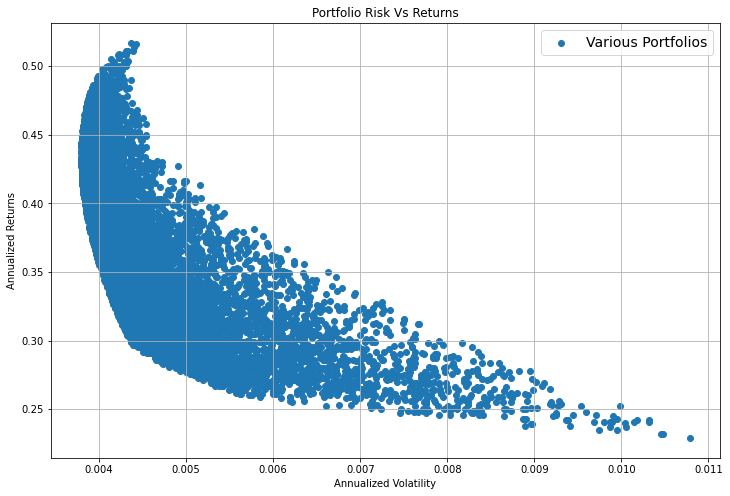

In [12]:
# Plotting it visually
fig = plt.figure(figsize=(12, 8))
plt.scatter(x='Ann_Variance', y='Ann_Returns', data=portfolios, label='Various Portfolios')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Returns')
plt.title('Portfolio Risk Vs Returns')
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

In [13]:
# Minimum Risk Portfolio
portfolios.loc[portfolios.Ann_Variance == portfolios.Ann_Variance.min()]

,AAPL,FB,GOOG,NFLX,Ann_Returns,Ann_Variance
7108,0.343,0.146,0.454,0.058,0.427,0.003792


### Reference

- https://blog.quantinsti.com/calculating-covariance-matrix-portfolio-variance/